In [1]:
from SAM_DataProcess import SAM_DataProcess
from SAM_DataVisualize import SAM_DataVisualize

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
from matplotlib.ticker import LinearLocator
from matplotlib import cm
import os

In [3]:
# establish an instance of the SAM object to visualize results from different output form (2D, 3D, stat)

In [4]:
# read in data:
DataRoot = '/data/xchen/SAM_LES_Orion'
CaseFolder = 'RICO_RRTM4PBL_1.5day'
#CaseFolder = 'RICO_RRTM_3day'
DataPath = os.path.join(DataRoot, CaseFolder)

figlocdir = 'Figs'    # this will create a local folder name "Figs" under the datapath;

SubFolders = dict()
SubFolders['2D'] = 'OUT_2D'
SubFolders['3D'] = 'OUT_3D'
SubFolders['STAT'] = 'OUT_STAT'

caseID = 'RICO_128x128x120_dx100m_standard_test_RRTM4PBL'
#caseID = 'RICO_128x128x120_dx100m_standard_test'
# number of processors for this run:
ncpu = 64 
file_prefix = caseID + '_{0:d}'.format(ncpu)
print(file_prefix)

filenames = dict()
filenames['2D'] = file_prefix + '.2Dbin_1.nc'
#filenames['2D'] = file_prefix + '.2Dcom_1.nc'
#filenames['3D'] = file_prefix + '.nc'
filenames['STAT'] = caseID + '.nc'


# now start to read in data:
for key, fn in filenames.items():
    absFN = os.path.join(DataPath, SubFolders[key], fn)
    print('reading: ' + absFN)
    # construct dataname dynamically:
    exec('ds_' + key + '= xr.open_dataset(absFN)')
        
        

RICO_128x128x120_dx100m_standard_test_RRTM4PBL_64
reading: /data/xchen/SAM_LES_Orion/RICO_RRTM4PBL_1.5day/OUT_2D/RICO_128x128x120_dx100m_standard_test_RRTM4PBL_64.2Dbin_1.nc
reading: /data/xchen/SAM_LES_Orion/RICO_RRTM4PBL_1.5day/OUT_STAT/RICO_128x128x120_dx100m_standard_test_RRTM4PBL.nc


In [5]:
# when the file is OUT_2D, add add total water path to the data
ds_2D['TWP'] = ds_2D.CWP + ds_2D.IWP + ds_2D.PW 
ds_2D['logCWP'] = np.log10(ds_2D.CWP)

# reset attribute for logCWP:
ds_2D['logCWP'] = ds_2D.logCWP.assign_attrs(long_name='log10 Cloud Water Path')

/home/xchen/.conda/envs/eurec4a/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [6]:
out_stat = SAM_DataVisualize()
out_2D = SAM_DataVisualize()

In [7]:
out_stat.var = ['CLD','PRECIP', 'RADQR', 'THETAV','QV','TVFLUX', 'U','V', 'TKE']
out_stat.path = DataPath
out_stat.caseID = CaseFolder  #'RICO_RRTM4PBL_1.5day'
out_stat.nc = ds_STAT

In [8]:
out_2D.path = DataPath
out_2D.caseID = CaseFolder
out_2D.nc = ds_2D

plotting standard variables
saving figure as RICO_RRTM4PBL_1.5day_domain_mean_evolution_of_standard_variables.jpg
to /data/xchen/SAM_LES_Orion/RICO_RRTM4PBL_1.5day/Figs


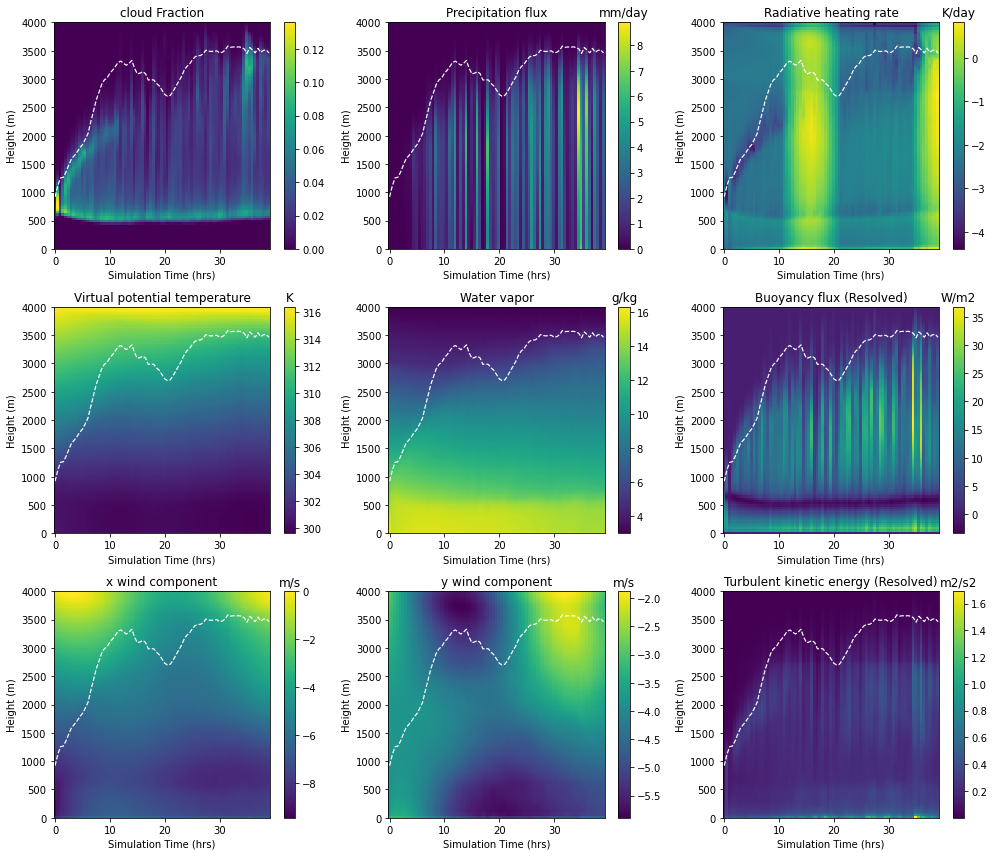

In [9]:
# 1. plot domain mean evolution:
out_stat.domain_mean_evolution(figsize=(14,12), svfig = True, svdir=figlocdir)

saving figure as RICO_RRTM4PBL_1.5day_domain_mean_vertical_profiles_of_key_parameters.jpg
to /data/xchen/SAM_LES_Orion/RICO_RRTM4PBL_1.5day/Figs


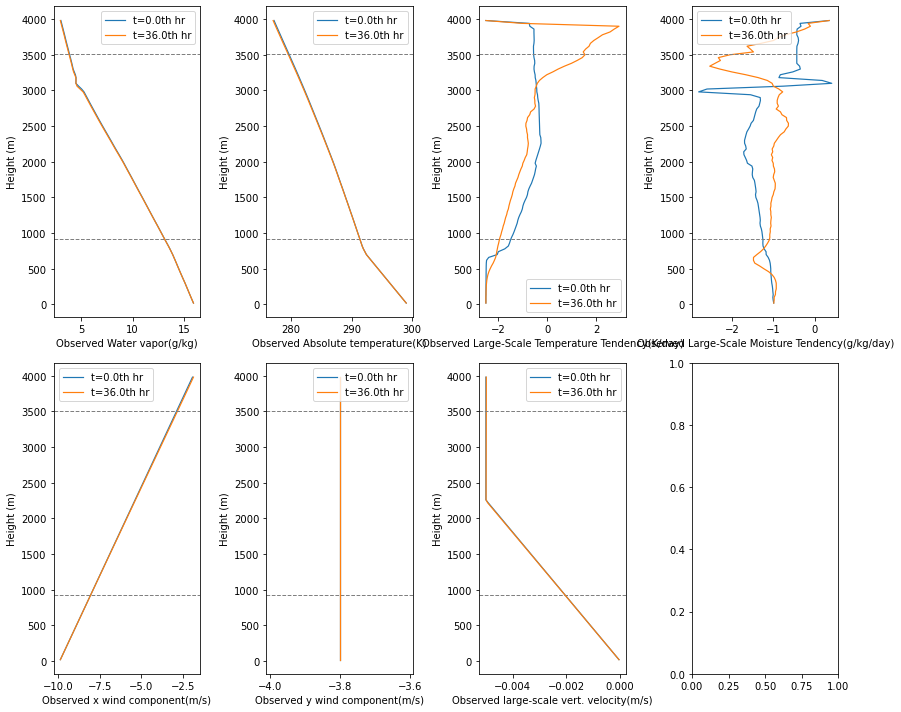

In [10]:
# 2. plot domain mean vertical profile at selected simulation time (initial and the end of simulation)
# somehow the data structure is not consistent with each other.
init_key_vars = ['QVOBS','TABSOBS','TTEND','QTEND','UOBS','VOBS','WOBS']
out_stat.domain_mean_profiles(var_list = init_key_vars, simThr = [0, 36],ncol=4, figsize=(12,10), svfig=True, 
                         svdir=figlocdir)


saving figure as RICO_RRTM4PBL_1.5day_spatial_evolution_of_PW_CWP_TB.jpg
to /data/xchen/SAM_LES_Orion/RICO_RRTM4PBL_1.5day/Figs


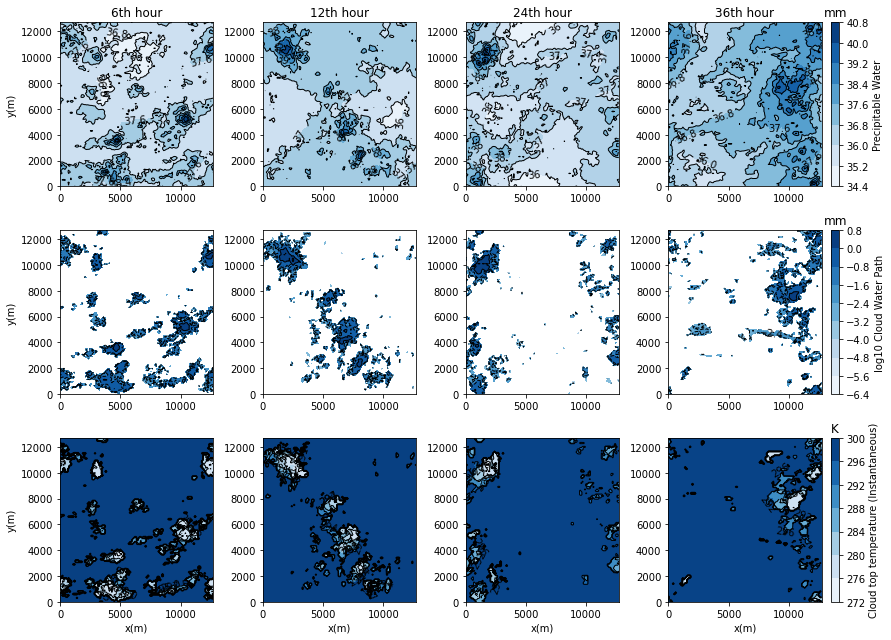

In [11]:
## ------- out_2D ------------ ##
# plot domain evolution of vertically integrated (or 2D) quantities:
var_list = ['PW','logCWP', 'TB']
out_2D.spatial_map(var_list = var_list, zlev=0, ColIntFlag=True, simThr=[6,12,24,36], figsize=(12.5,9), 
                 colormap=cm.Blues,svfig=True, svdir=figlocdir, figname_suff='PW_CWP_TB')

saving figure as RICO_RRTM4PBL_1.5day_spatial_evolution_of_SurfaceWind_850mbWind.jpg
to /data/xchen/SAM_LES_Orion/RICO_RRTM4PBL_1.5day/Figs


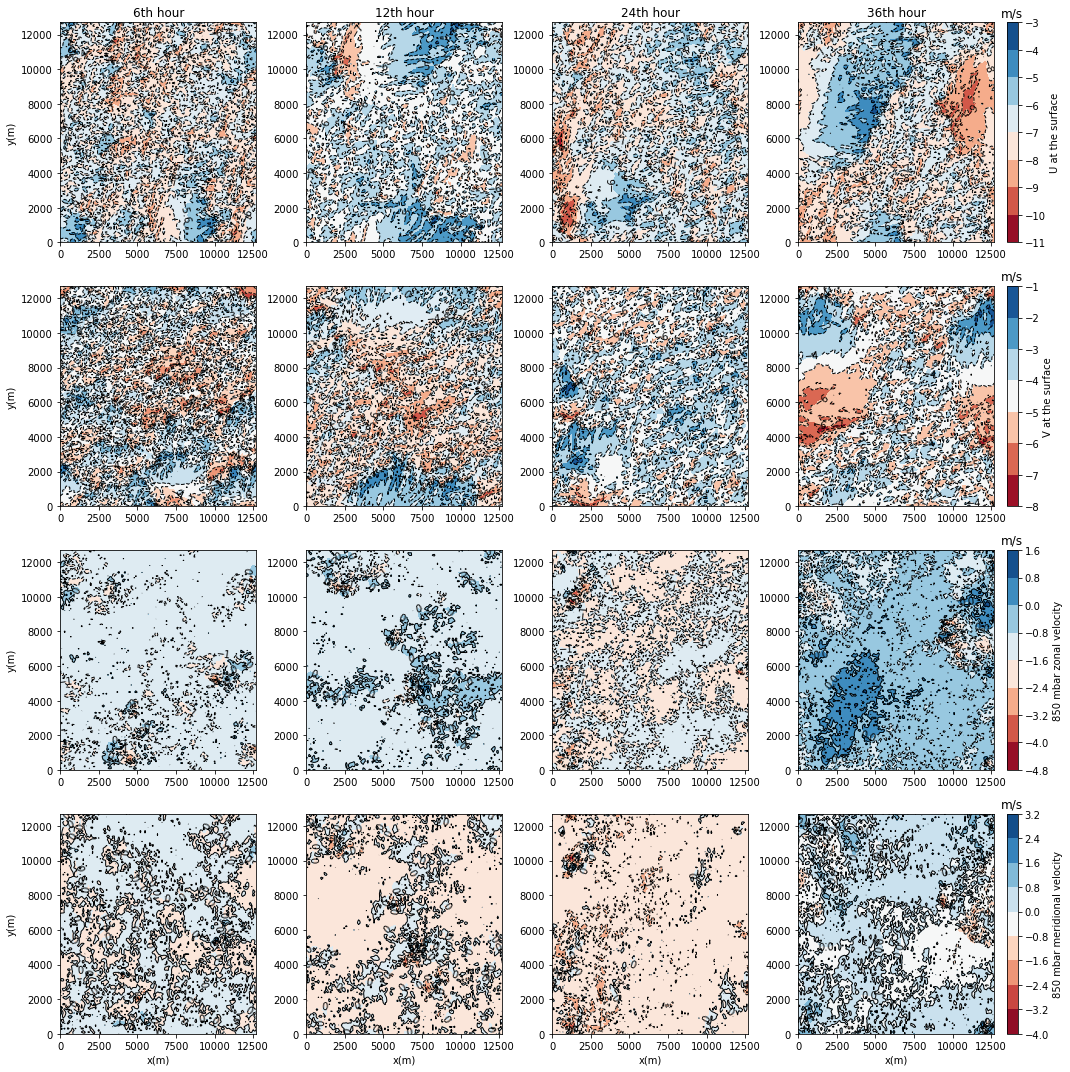

In [12]:
# try fixing the range of the colorbar to be equal in positive and negative range.
var_list = ['USFC','VSFC', 'U850','V850']
out_2D.spatial_map(var_list = var_list, zlev=0, ColIntFlag=True, simThr=[6,12,24,36], figsize=(15,15), 
                 colormap=cm.RdBu,svfig=True, svdir=figlocdir, figname_suff='SurfaceWind_850mbWind')

In [13]:
# -- Block averaging and quartile sorted variables:

out_2D_datap = SAM_DataProcess()
out_2D_datap.path = out_2D.path
out_2D_datap.caseID = out_2D.caseID
out_2D_datap.nc = ds_2D

# call into the block averaging and quartile sorted function/method
nblock=64 
ds_blockave_obj = out_2D_datap.block_averaging

In [14]:
ds_blockave=ds_blockave_obj()

In [15]:
TWP_bins=np.percentile(ds_blockave.TWP, np.linspace(0,100,5))
TWP_bin_labels = ['Q1','Q2','Q3','Q4']
out_2D_datap.nc = ds_blockave
ds_qrtave = out_2D_datap.TWPsorted_quartile_statistics(TWP_bins=TWP_bins, TWP_bin_labels = TWP_bin_labels)

100%|██████████████████████████████████████████████████████████████████████| 10/10 [01:15<00:00,  7.58s/it]


In [16]:
filename = out_2D_datap.caseID + '_quartile_mean_ds_for_testing_updated.nc'
ncexist_flag = os.path.exists(filename)
#

In [17]:
if ncexist_flag:
    ds_qrtave = xr.open_dataset(filename)
else:
    ds_qrtave.to_netcdf(filename)

In [18]:
ds_2D

<xarray.Dataset>
Dimensions:  (time: 233, x: 128, y: 128)
Coordinates:
  * x        (x) float32 0.0 100.0 200.0 300.0 ... 1.25e+04 1.26e+04 1.27e+04
  * y        (y) float32 0.0 100.0 200.0 300.0 ... 1.25e+04 1.26e+04 1.27e+04
  * time     (time) float32 336.0 336.0 336.1 336.1 ... 337.6 337.6 337.6 337.7
Data variables: (12/30)
    Prec     (time, y, x) float32 ...
    SHF      (time, y, x) float32 ...
    LHF      (time, y, x) float32 ...
    LWNS     (time, y, x) float32 ...
    LWNSC    (time, y, x) float32 ...
    LWNT     (time, y, x) float32 ...
    ...       ...
    V850     (time, y, x) float32 ...
    ZC       (time, y, x) float32 ...
    TB       (time, y, x) float32 ...
    ZE       (time, y, x) float32 ...
    TWP      (time, y, x) float32 37.4 37.39 37.47 37.49 ... 37.11 37.06 37.07
    logCWP   (time, y, x) float32 -inf -inf -inf -inf ... -inf -inf -inf -inf

In [19]:
# temporary solution:
for vn in ['PW','CWP','ZC']:
    ds_qrtave[vn] = ds_qrtave[vn].assign_attrs(long_name=ds_2D[vn].long_name)
    ds_qrtave[vn] = ds_qrtave[vn].assign_attrs(units=ds_2D[vn].units)


In [20]:
ds_qrtave['time'] = ds_qrtave['time'].assign_attrs(long_name=ds_2D.time.long_name)
ds_qrtave['time'] = ds_qrtave['time'].assign_attrs(units=ds_2D.time.units)

In [21]:
# establish a plotting class:
qrtds = SAM_DataVisualize()

# initialize data
qrtds.nc = ds_qrtave
qrtds.var = ['PW','CWP','ZC']
qrtds.path = out_2D_datap.path
qrtds.caseID = out_2D_datap.caseID

In [22]:
#varname=None, time_smoothing=False, time_smoothing_window=None,
dt = (ds_2D.time[1]-ds_2D.time[0])*24
nt = int(2/dt)
print('smoothing window = {0:.1f} hrs'.format(2))
print('smoothing over {0:.0f} points'.format(nt))
#qrtds.quartile_evolution(varname=None)


smoothing window = 2.0 hrs
smoothing over 11 points


No handles with labels found to put in legend.
No handles with labels found to put in legend.


plotting standard variables
saving figure as RICO_RRTM4PBL_1.5day_TWP_quartile_mean_evolution_of_standard_variables.jpg
to /data/xchen/SAM_LES_Orion/RICO_RRTM4PBL_1.5day/Figs


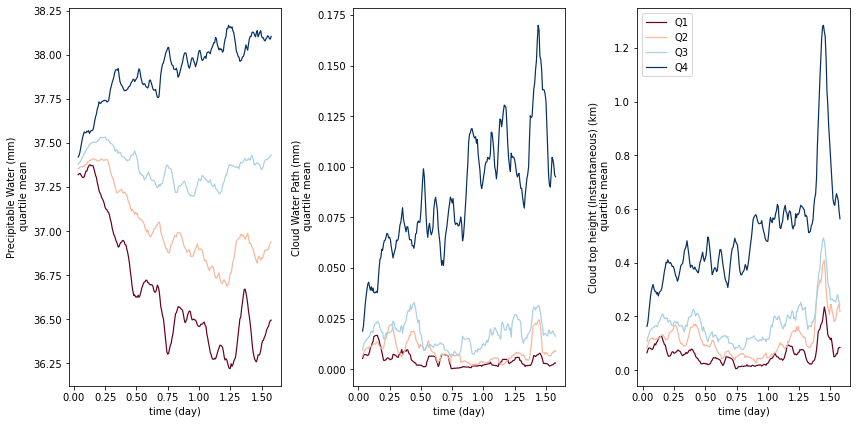

In [23]:
qrtds.quartile_evolution(tsm=True, tsm_window=nt, figsize=(12,6), svfig=True, svdir = figlocdir)

In [24]:
# 3D data?